In [1]:
import os
import pandas as pd
import tabula

In [2]:
data = []

In [3]:
for file in os.listdir('.'):
    if not file.endswith('.pdf'):
        continue
    tables = tabula.read_pdf(file, pages='all', multiple_tables=False)
    table = tables[0].to_numpy()
    year = table[1][1]
    for i in range(3, 13):
        state, production, share = table[i][1:]
        if type(production) == str:
            production = production.replace(',', '')
            production = float(production)
        if type(share) == str:
            share = share.replace(',', '')
            share = float(share)
        data.append((state, production, share, year))

In [4]:
states = set([row[0] for row in data])
df_dict = {}
for state in states:
    df_dict[state] = pd.DataFrame(columns=['Year', 'Production', 'Share'])

In [5]:
for state, production, share, year in data:
    df_dict[state].loc[len(df_dict[state].index)] = [year, production, share]

In [16]:
for state, df in df_dict.items():
    df = df.sort_values(by='Year')
    df.to_csv(f"{state}_production_data.csv")
    df_dict[state] = df

In [17]:
import matplotlib.pyplot as plt

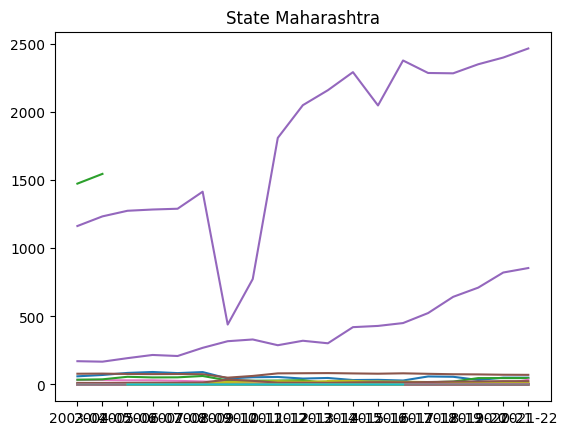

In [21]:
for state, df in df_dict.items():
    plt.title(f"State Maharashtra")
    plt.plot(df['Year'], df['Production'])
    plt.plot(df['Year'], df['Share'])